# Hungrig auf KI?

## Download the Data

In [1]:
!git clone https://github.com/Flinst0n/mini-food-11

Cloning into 'mini-food-11'...


In [2]:
%cd mini-food-11

D:\dev\food-11-ml\mini-food-11


In [3]:
!unzip "*.zip"

Der Befehl "unzip" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [4]:
%cd /content/

UsageError: Line magic function `%` not found.


## Import the data

In [1]:
import fastai.vision

DATA_PATH = "mini-food-11/"

In [2]:
data = fastai.vision.ImageDataBunch.from_folder(DATA_PATH, train=".", valid_pct=0.2,seed=747, ds_tfms=fastai.vision.get_transforms(), size=224, num_workers=0).normalize(fastai.vision.imagenet_stats)

## Inspect the Data Set

### Show classes and statistics

In [3]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baby_back_ribs',
  'beef_carpaccio',
  'caesar_salad',
  'cheesecake',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'hamburger',
  'oysters',
  'sashimi',
  'sushi'],
 11,
 8800,
 2200)

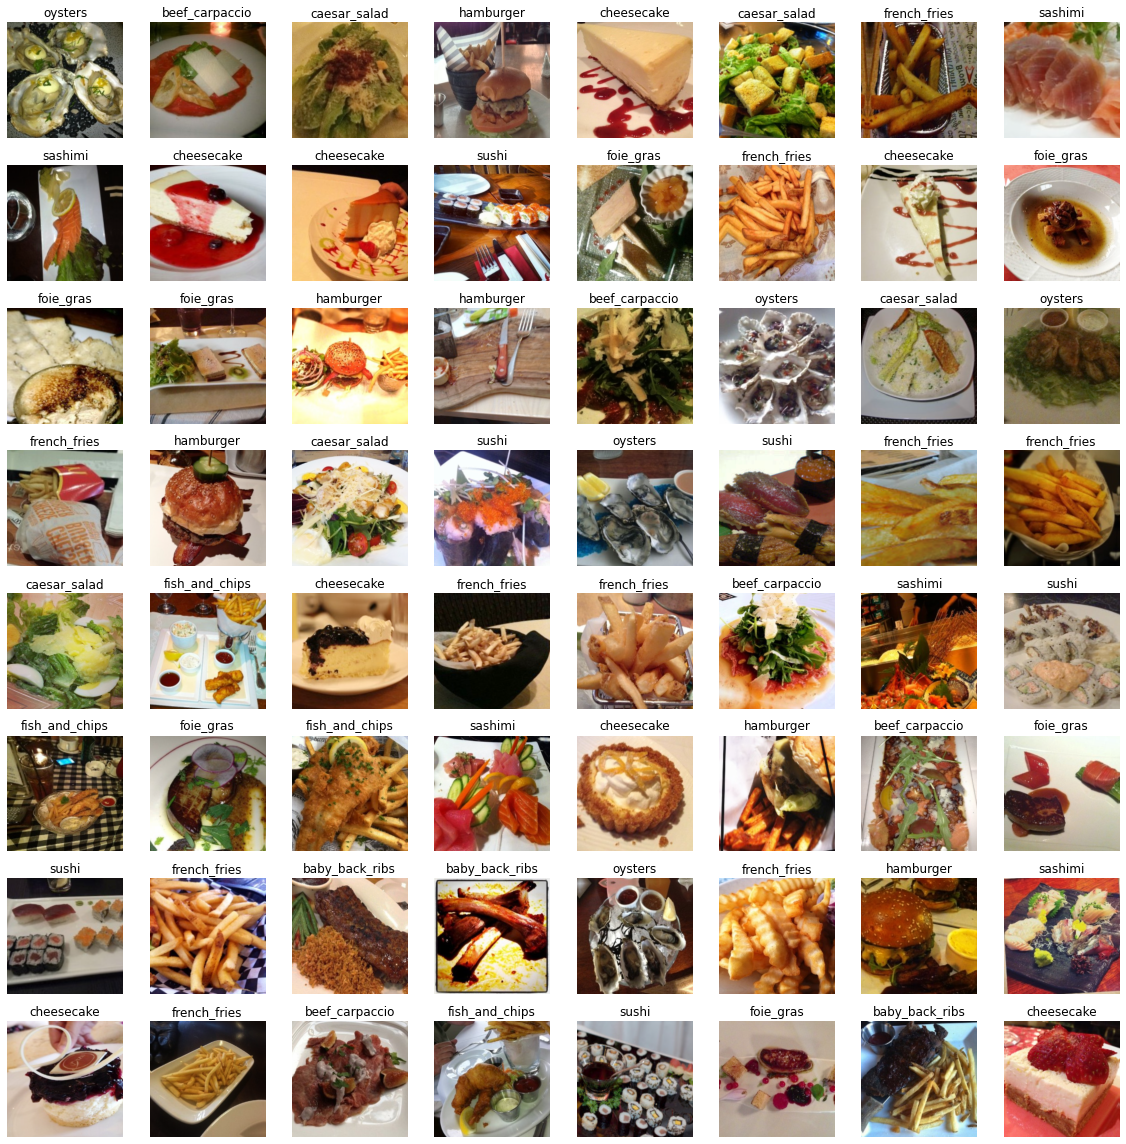

In [4]:
data.show_batch(rows=10, figsize=(16,16))

# Machine Learning

## Create model

In [ ]:
learner = fastai.vision.cnn_learner(data, fastai.vision.models.resnet34, metrics=[fastai.vision.accuracy])

## Set learnable layers

In [6]:
learner.freeze()

## Train the model on the training data set

In [7]:
number_epochs = 3
learning_rate = 1e-2

learner.fit_one_cycle(number_epochs, learning_rate)

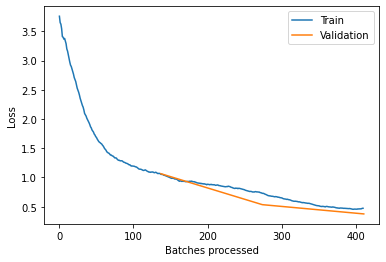

In [8]:
learner.recorder.plot_losses()

## Analyze the model on the test data set

In [9]:
interp = fastai.vision.ClassificationInterpretation.from_learner(learner)

d:\dev\python38\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
d:\dev\python38\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
d:\dev\python38\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple

d:\dev\python38\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
d:\dev\python38\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
d:\dev\python38\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple

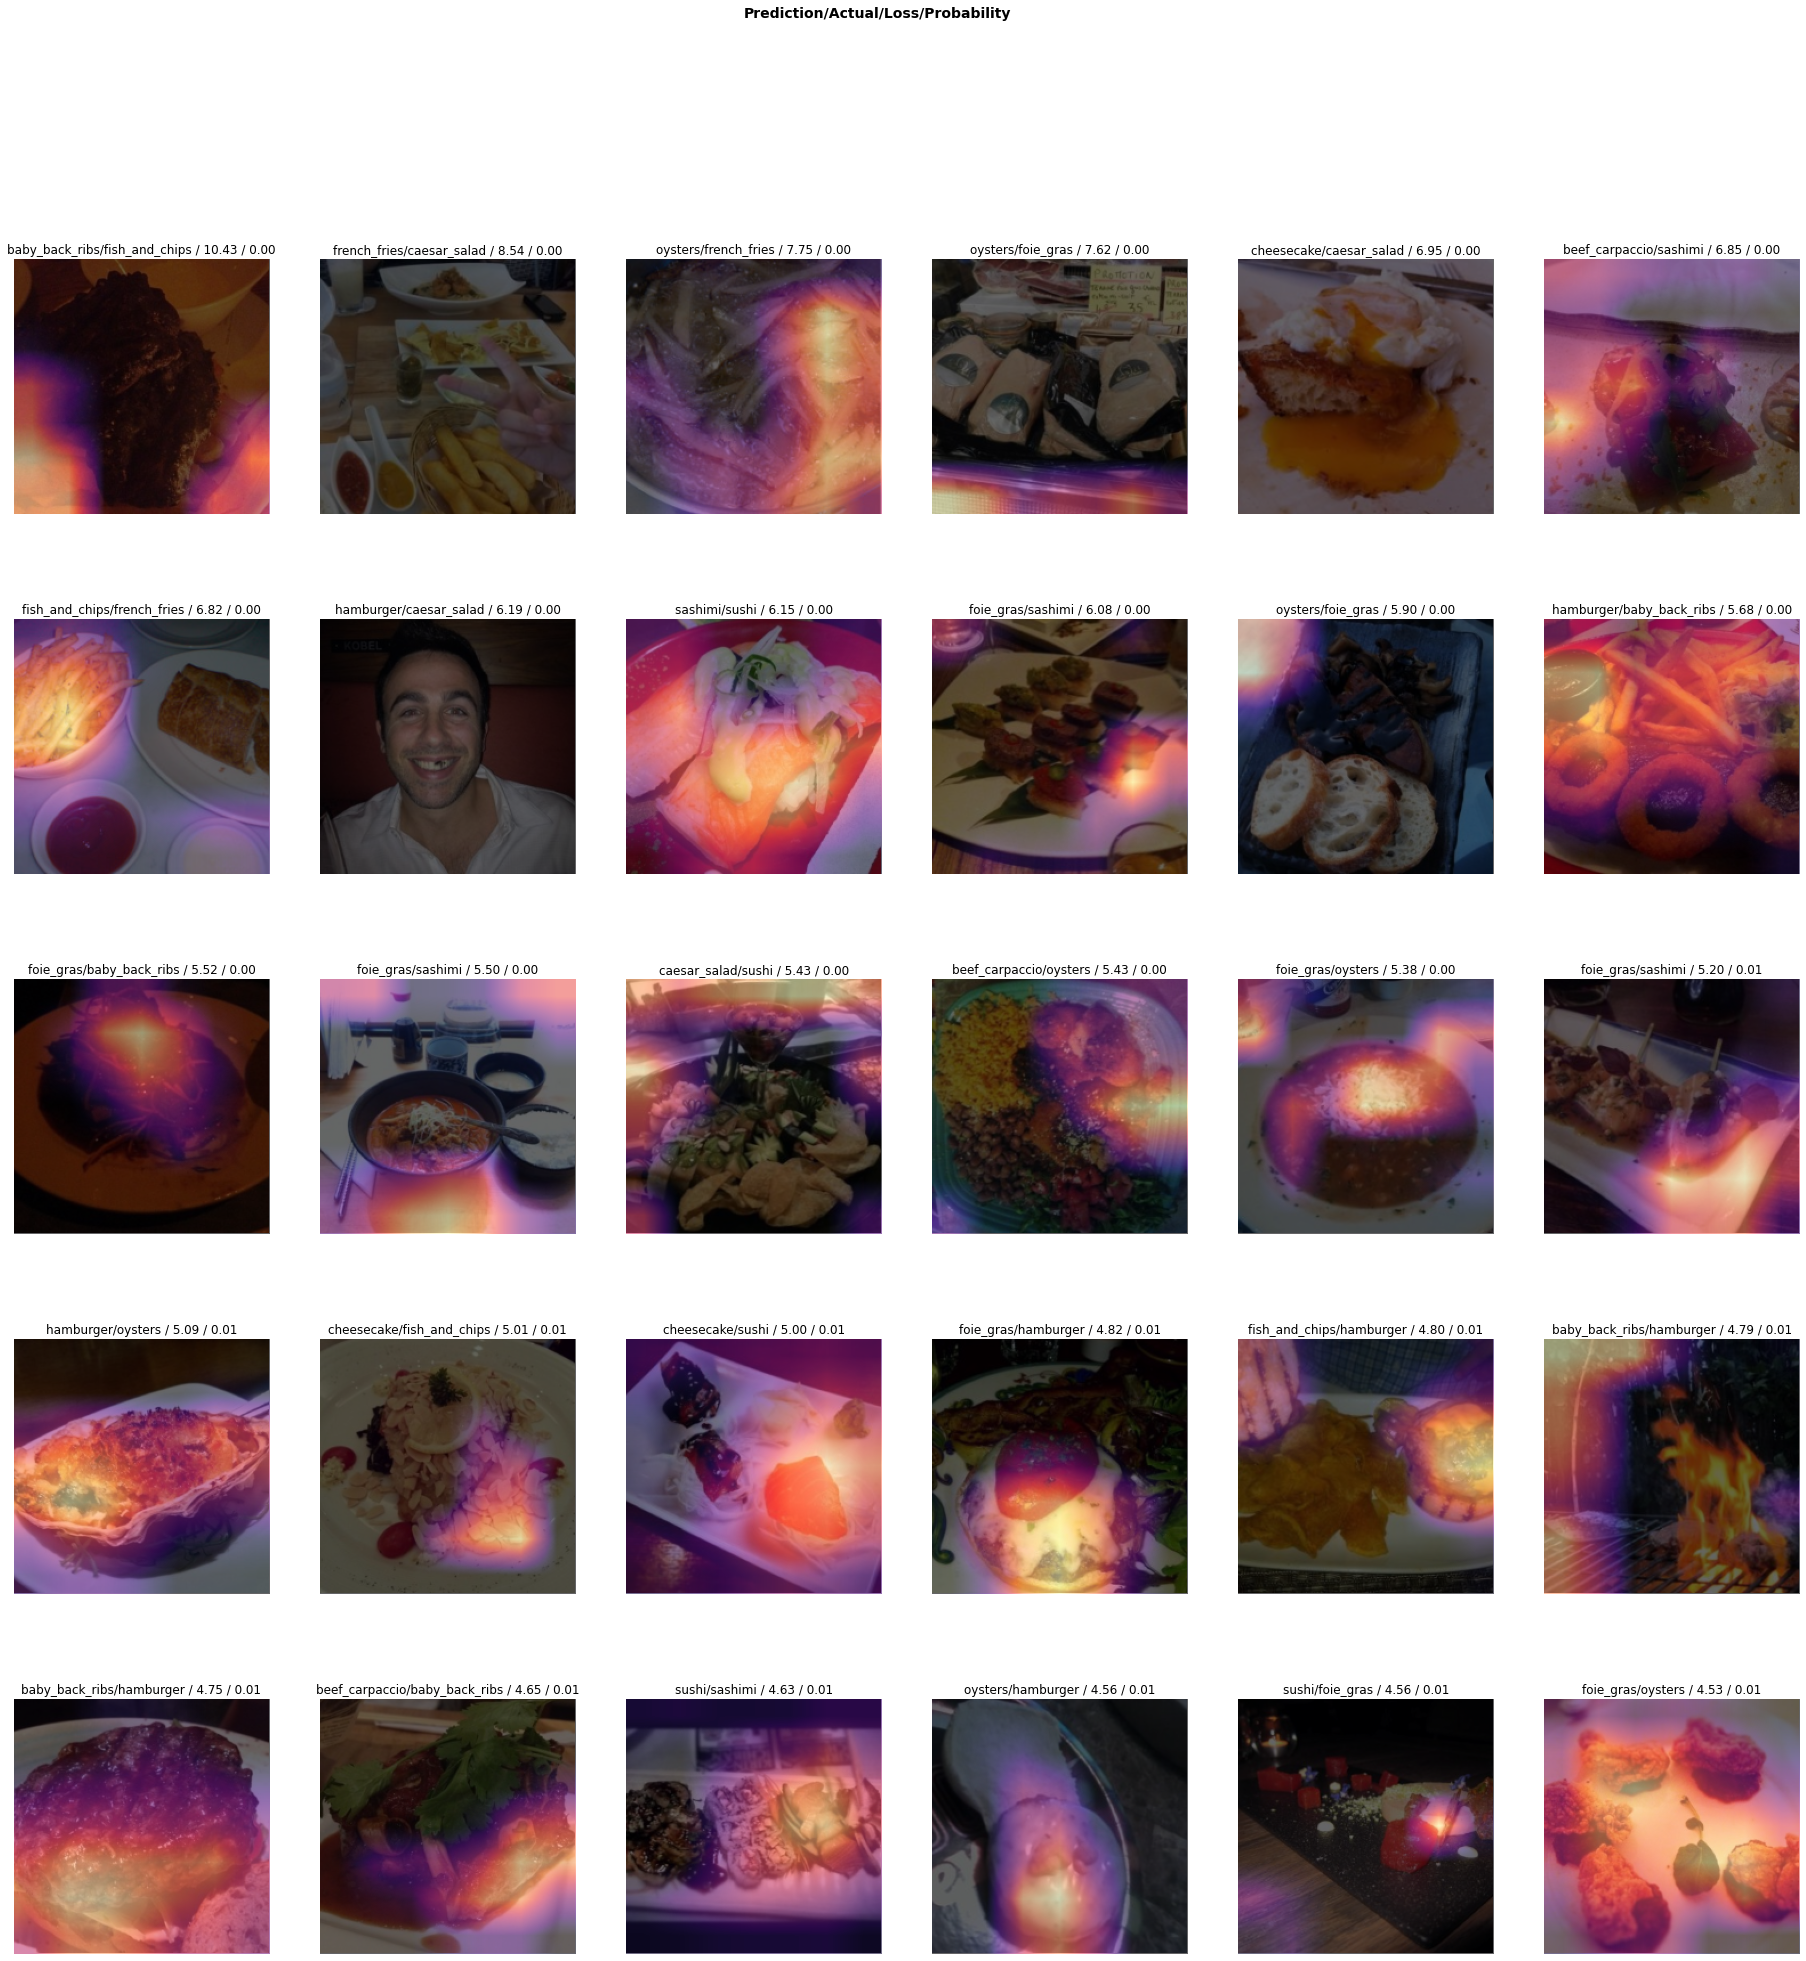

In [10]:
interp.plot_top_losses(30, figsize=(32,32), heatmap=True)

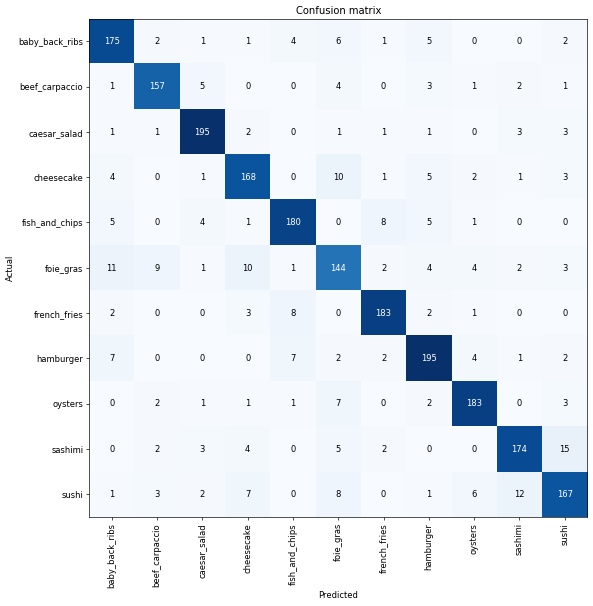

In [11]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

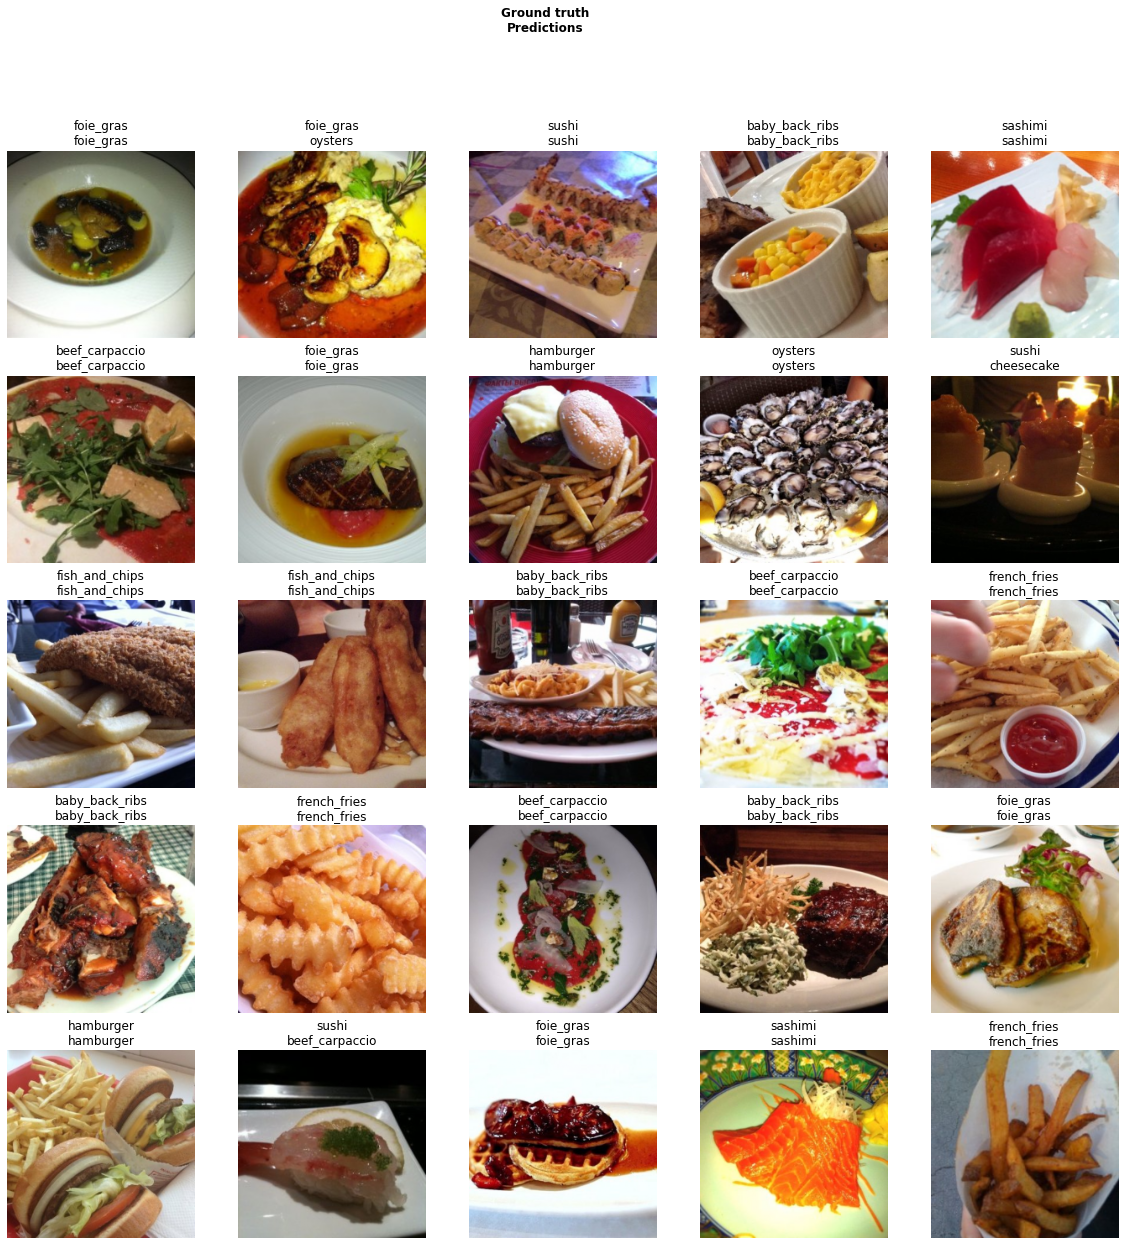

In [12]:
learner.show_results()

## Refine the model

In [13]:
learner.unfreeze()

In [14]:
learner.fit_one_cycle(10, 1e-6)